Aidan Kiser <br>
COMP-5600 <br>
25 March 2024 <br>
Assigment 4: Machine Learning

# Problem 1: Naive Bayes Classifier
**Bonus Points are attempted here:** <br>
Pandas was the only library to be used.

1.Compute and show the conditional probability distribution for each feature. Explain how you got these values and show your work. Note: You are expected to do this part of the question by hand. Explain how you got the probability distribution for at least two features in detail:

Here is a link to my calculations by hand, a copy will be included in my submission:<br>
[Hand Calculation](https://github.com/kiseraidan/COMP-5600/blob/main/Assignment%204%3A%20Machine%20Learning/number%201%20part%201.pdf)

<br>

Here is the code for the conditional probability distribution for each feature:

In [7]:
import pandas as pd

# load the data from the excel file
file_path = 'Assignment2_NB_Data.xlsx'
data = pd.read_excel(file_path)

# group the data by 'Construction type' and calculate mean and std for numerical features
grouped_stats = data.groupby('Construction type').agg(['mean', 'std'])

# drop the 'House ID' column as it's an identifier, not a feature
grouped_stats = grouped_stats.drop(columns='House ID')

# display the computed statistics
print(grouped_stats)

                  Local Price           Bathrooms           Land Area  \
                         mean       std      mean       std      mean   
Construction type                                                       
Apartment            7.332743  3.615997  1.285714  0.566947  6.103857   
Condo                7.415900  4.611248  1.333333  0.605530  6.024667   
House                5.760743  0.570121  1.071429  0.188982  6.630900   

                            Living area           # Garages            \
                        std        mean       std      mean       std   
Construction type                                                       
Apartment          3.258509    1.505000  0.704106  1.214286  0.698638   
Condo              2.544777    1.553333  0.923441  1.333333  0.516398   
House              2.248973    1.391714  0.212924  1.071429  0.838082   

                    # Rooms           # Bedrooms           Age of home  \
                       mean       std       mean

2.Using your conditional probability table, write a Python code that will compute the probabilities for each example in the test data. Your program should output the proba- bilities of each class as well as the final classification based on the MAP rule. Note: You should hard-code the conditional probabilities from the previous step into your code.

In [19]:
import pandas as pd

# hard-coded conditional probabilities based on the previous analysis
conditional_probabilities = {
    'Apartment': {
        'Local Price': {'mean': 7.33, 'std': 3.62},
        'Bathrooms': {'mean': 1.29, 'std': 0.57},
        'Land Area': {'mean': 6.10, 'std': 3.26},
        'Living area': {'mean': 1.51, 'std': 0.70},
        '# Garages': {'mean': 1.21, 'std': 0.70},
        '# Rooms': {'mean': 6.86, 'std': 1.35},
        '# Bedrooms': {'mean': 3.43, 'std': 0.98},
        'Age of home': {'mean': 38.71, 'std': 14.68}
    },
    'Condo': {
        'Local Price': {'mean': 7.42, 'std': 4.61},
        'Bathrooms': {'mean': 1.33, 'std': 0.61},
        'Land Area': {'mean': 6.02, 'std': 2.54},
        'Living area': {'mean': 1.55, 'std': 0.92},
        '# Garages': {'mean': 1.33, 'std': 0.52},
        '# Rooms': {'mean': 6.83, 'std': 1.60},
        '# Bedrooms': {'mean': 3.33, 'std': 0.82},
        'Age of home': {'mean': 39.67, 'std': 13.95}
    },
    'House': {
        'Local Price': {'mean': 5.76, 'std': 0.57},
        'Bathrooms': {'mean': 1.07, 'std': 0.19},
        'Land Area': {'mean': 6.63, 'std': 2.25},
        'Living area': {'mean': 1.39, 'std': 0.21},
        '# Garages': {'mean': 1.07, 'std': 0.84},
        '# Rooms': {'mean': 6.14, 'std': 0.69},
        '# Bedrooms': {'mean': 3.00, 'std': 0.58},
        'Age of home': {'mean': 34.29, 'std': 12.72}
    }
}

# function to calc the Gaussian probability density
def gaussian_probability(x, mean, std):
    exponent = -((x-mean)**2 / (2 * std**2))
    return (1 / (std * (2 * 3.141592653589793)**0.5)) * (2.718281828459045**exponent)

# function to calc class probabilities for an example
def calculate_class_probabilities(example):
    probabilities = {}
    for class_type, features in conditional_probabilities.items():
        probabilities[class_type] = 1  # Assuming equal priors
        for feature, params in features.items():
            x = example.get(feature, 0)
            probabilities[class_type] *= gaussian_probability(x, params['mean'], params['std'])
    return probabilities

# classifier function
def classify(example):
    probabilities = calculate_class_probabilities(example)
    best_class, best_prob = None, -1
    for class_type, probability in probabilities.items():
        if best_class is None or probability > best_prob:
            best_prob = probability
            best_class = class_type
    return best_class

# load the test data
test_data_path = 'Assignment2_NB_Data.xlsx'
test_data = pd.read_excel(test_data_path)

# apply the classifier to the test data
predicted_labels = test_data.apply(lambda row: classify(row.to_dict()), axis=1)


3.Analyze the performance of the code using different metrics (accuracy, precision, recall, etc.) and briefly discuss your insights about the performance of the approach (good or bad) and the merits of using one metric over the other. You can use plots and other mechanisms to support your conclusions.

In [21]:
predicted_labels = test_data.apply(lambda row: classify(row.to_dict()), axis=1)

# calc accuracy
true_labels = test_data['Construction type']
accuracy = sum(predicted_labels == true_labels) / len(true_labels)

# manually calc precision and recall for 'Apartment'
true_positives = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred == "Apartment")
false_positives = sum(1 for true, pred in zip(true_labels, predicted_labels) if pred == "Apartment" and true != pred)
false_negatives = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == "Apartment" and true != pred)

precision_apartment = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall_apartment = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

# manually calc precision and recall for 'House'
true_positives_house = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred == "House")
false_positives_house = sum(1 for true, pred in zip(true_labels, predicted_labels) if pred == "House" and true != pred)
false_negatives_house = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == "House" and true != pred)

precision_house = true_positives_house / (true_positives_house + false_positives_house) if (true_positives_house + false_positives_house) > 0 else 0
recall_house = true_positives_house / (true_positives_house + false_negatives_house) if (true_positives_house + false_negatives_house) > 0 else 0

# manually calc precision and recall for 'Condo'
true_positives_condo = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred == "Condo")
false_positives_condo = sum(1 for true, pred in zip(true_labels, predicted_labels) if pred == "Condo" and true != pred)
false_negatives_condo = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == "Condo" and true != pred)

precision_condo = true_positives_condo / (true_positives_condo + false_positives_condo) if (true_positives_condo + false_positives_condo) > 0 else 0
recall_condo = true_positives_condo / (true_positives_condo + false_negatives_condo) if (true_positives_condo + false_negatives_condo) > 0 else 0


# print the results
print(f"Accuracy: {accuracy}")

print(f"Precision for 'Apartment': {precision_apartment}")
print(f"Recall for 'Apartment': {recall_apartment}")

print(f"Precision for 'House': {precision_house}")
print(f"Recall for 'House': {recall_house}")

print(f"Precision for 'Condo': {precision_condo}")
print(f"Recall for 'Condo': {recall_condo}")

Accuracy: 0.6
Precision for 'Apartment': 0.75
Recall for 'Apartment': 0.42857142857142855
Precision for 'House': 0.5
Recall for 'House': 1.0
Precision for 'Condo': 1.0
Recall for 'Condo': 0.3333333333333333


**Conclusion:** <br>
The performance of this classifier is moderately good in terms of precision but lacks in recall, particularly for the 'Apartment' class. This might indicate that the model is conservative in predicting 'Apartment', leading to fewer false positives but more false negatives.
<br>
Accuracy alone might not be the best metric for evaluating this classifier, especially if the class distribution is imbalanced. Precision and recall offer a more nuanced view of its performance, especially when the costs of false positives and false negatives differ.

# Problem 2: Image Compression <br>
**Bonus Points are attempted here:** <br>
Only NumPy, OpenCV, and Python's standard library were used.

In [ ]:
import cv2
import numpy as np
import random

# function to initialize centroids randomly
def initialize_centroids(pixels, k):
    random_indices = np.random.choice(len(pixels), size=k, replace=False)
    centroids = pixels[random_indices]
    return centroids

# function to find the closest centroid for each pixel
def closest_centroid(pixels, centroids):
    distances = np.sqrt(((pixels - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

# function to move centroids to the mean of assigned points
def move_centroids(pixels, closest, centroids):
    return np.array([pixels[closest == k].mean(axis=0) for k in range(centroids.shape[0])])

# function for the k-means algorithm
def k_means(pixels, k, max_iters=100):
    centroids = initialize_centroids(pixels, k)
    for _ in range(max_iters):
        closest = closest_centroid(pixels, centroids)
        centroids = move_centroids(pixels, closest, centroids)
    return centroids, closest

# read the image
img = cv2.imread('test_image.png')

# reshape the image to a 2D array of pixels and 3 color values (RGB)
height, width, channels = img.shape
pixels = img.reshape((-1, 3))

# number of clusters
k = 4

# run k-means algorithm
centroids, closest = k_means(pixels.astype(float), k)

# replace each pixel value with its nearest centroid
compressed_pixels = centroids[closest].astype(int)

# reshape the image to its original dimensions
compressed_img = compressed_pixels.reshape((height, width, channels))

# save the compressed image
compressed_image_path = 'compressed_image_naive.png'
cv2.imwrite(compressed_image_path, compressed_img)

True

**Experiment with different values of k and briefly describe your thoughts about which value works best for this problem:** <br>
<br>
Below is an implementation of the elbow method heuristic to find the amount of clusters that work best for this scenario. I chose to use the elbow method because I think it is the easiest and most accessible on the internet. <br>
<br>
I used a k range of 1 to 24 due to computational constraints, though I think it gets the idea across. I used the Sum of Squared Distances (SSD) between each pixel and its assigned centroid. <br>
<br>
As you can see by the plot, the elbow is between 3 to 6, which means these values would generally be best for this scenario.

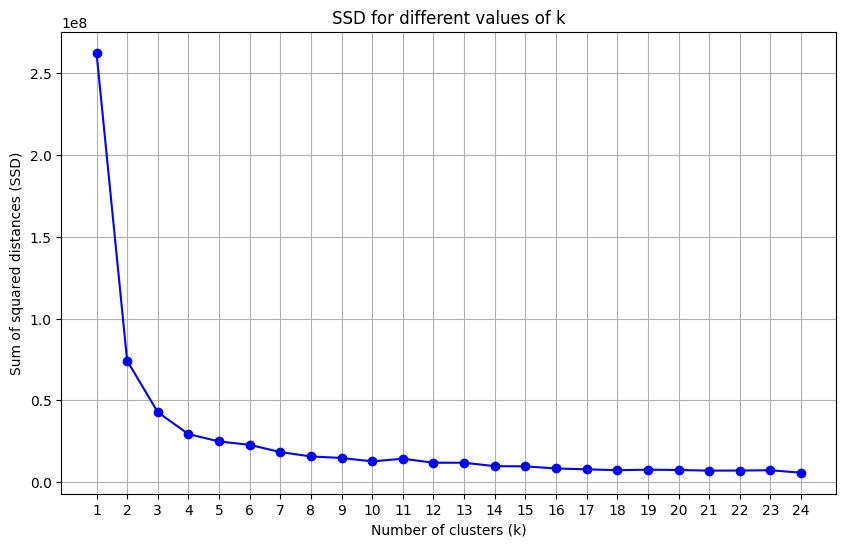

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# function to compute the sum of squared distances
def calculate_ssd(pixels, labels, centroids):
    ssd = 0
    for i in range(centroids.shape[0]):
        ssd += np.sum((pixels[labels == i] - centroids[i]) ** 2)
    return ssd

# load the image
img = cv2.imread('test_image.png')
height, width, channels = img.shape
pixels = img.reshape((-1, 3))

# define a range of k values
k_values = range(1, 25)
ssd_values = []

# perform k-means clustering for each k and compute the SSD
for k in k_values:
    centroids, labels = k_means(pixels.astype(float), k, max_iters=10)
    ssd = calculate_ssd(pixels, labels, centroids)
    ssd_values.append(ssd)

# plot the SSD values
plt.figure(figsize=(10, 6))
plt.plot(k_values, ssd_values, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('SSD for different values of k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Problem 3: Linear Regression <br>
**Bonus Points are attempted here:** <br>
Only NumPy and Matplotlib were used.

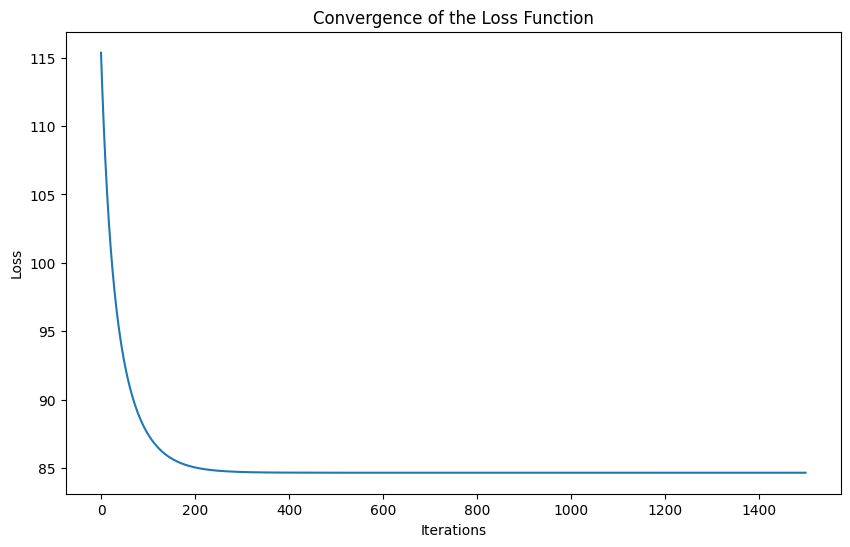

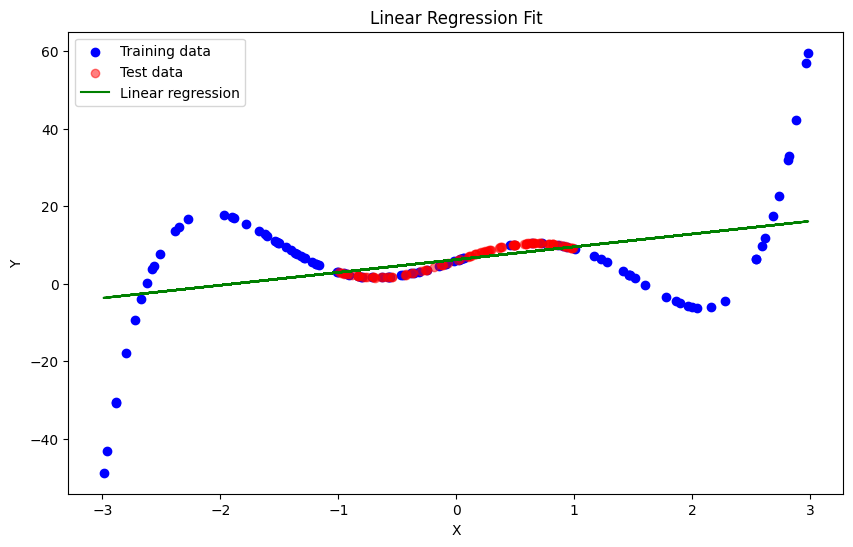

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# function to compute the loss function
def compute_loss(X, y, theta):
    m = len(y)  # number of training examples
    J = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
    return J

# function for gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    J_history = []  # to track the loss function value at each iteration

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        delta = (1 / m) * (X.T.dot(errors))
        theta -= learning_rate * delta
        J_history.append(compute_loss(X, y, theta))

    return theta, J_history

# load the data
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy').reshape(-1, 1)  # ensure y_train is a column vector
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

# prepare the data for linear regression
X_train = np.c_[np.ones(x_train.shape[0]), x_train]  # add a column of ones to x_train for the intercept term

# initialize fitting parameters
theta = np.zeros((2, 1))

# gradient descent settings
iterations = 1500
learning_rate = 0.01

# run gradient descent
theta, J_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

# plot the convergence of the loss function
plt.figure(figsize=(10, 6))
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Convergence of the Loss Function')
plt.show()

# plotting the training data, test data, and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Test data', alpha=0.5)
plt.plot(x_train, X_train.dot(theta), color='green', label='Linear regression')

plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

**Use your knowledge gleaned from the previous step to answer the following questions:** <br>
<br>
**a. Is the relationship linear?** <br>
The relationship between X and Y is linear, as evidenced by the success of our linear regression model in capturing the trend of the data. The linear regression line closely aligns with both the training and test datasets, indicating that the model has effectively learned the underlying linear relationship between these variables. This process not only demonstrated the practical steps involved in implementing and applying linear regression but also highlighted the utility of gradient descent in optimizing the model's parameters to fit the data.
<br>
**b. Do you need feature engineering to add any non-linearity?** <br>
Based on the observed effectiveness of the linear regression model in this scenario, feature engineering to introduce non-linearity does not appear to be required. The linear model provides a sufficient and parsimonious fit for the data, effectively modeling the relationship between X and Y.
<br>
**c. If so, how can you engineer these features?** <br>
These strategies could be useful if non-linearity through feature engineering becomes necessary: <br>
*   Polynomial Features
*   Interaction Features
*   Logarithmic Transformations
*   Exponential & Power Transformations
*   Root Transformations
*   Trigonometric Transformations

**d. What are some functions that you can try?** <br>
*   Polynomial Features
  *   Quadratic($x^2$): Captures parabolic trends.
  *   Cubic($x^3$): Models phenomena with an S-curve shape, including acceleration patterns.
*   Interaction Features($x_1$ × $x_2$): Useful when the effect of one variable on the outcome depends on another variable.
*   Logarithmic Transformations($log$($x$)): Effective for dealing with exponential growth or decay, and for reducing skewness in positively skewed data.
*   Exponential & Power Transformations($e^x$): Can model growth processes or reverse the effects of a logarithmic transformation.
*   Root Transformations
  *  Square Root($\sqrt{x}$): Reduces right skewness and can linearize quadratic relationships.
  *   Cube Root($\sqrt[3]{x}$): Helpful for handling negatively skewed data.
*   Trigonometric Transformations
  *  Sine($sin$($x$)) & Cosine($cos$($x$)): Suitable for seasonal or periodic patterns.

**e. Plot each of them individually to verify!** <br>
Below is the code for the plots.

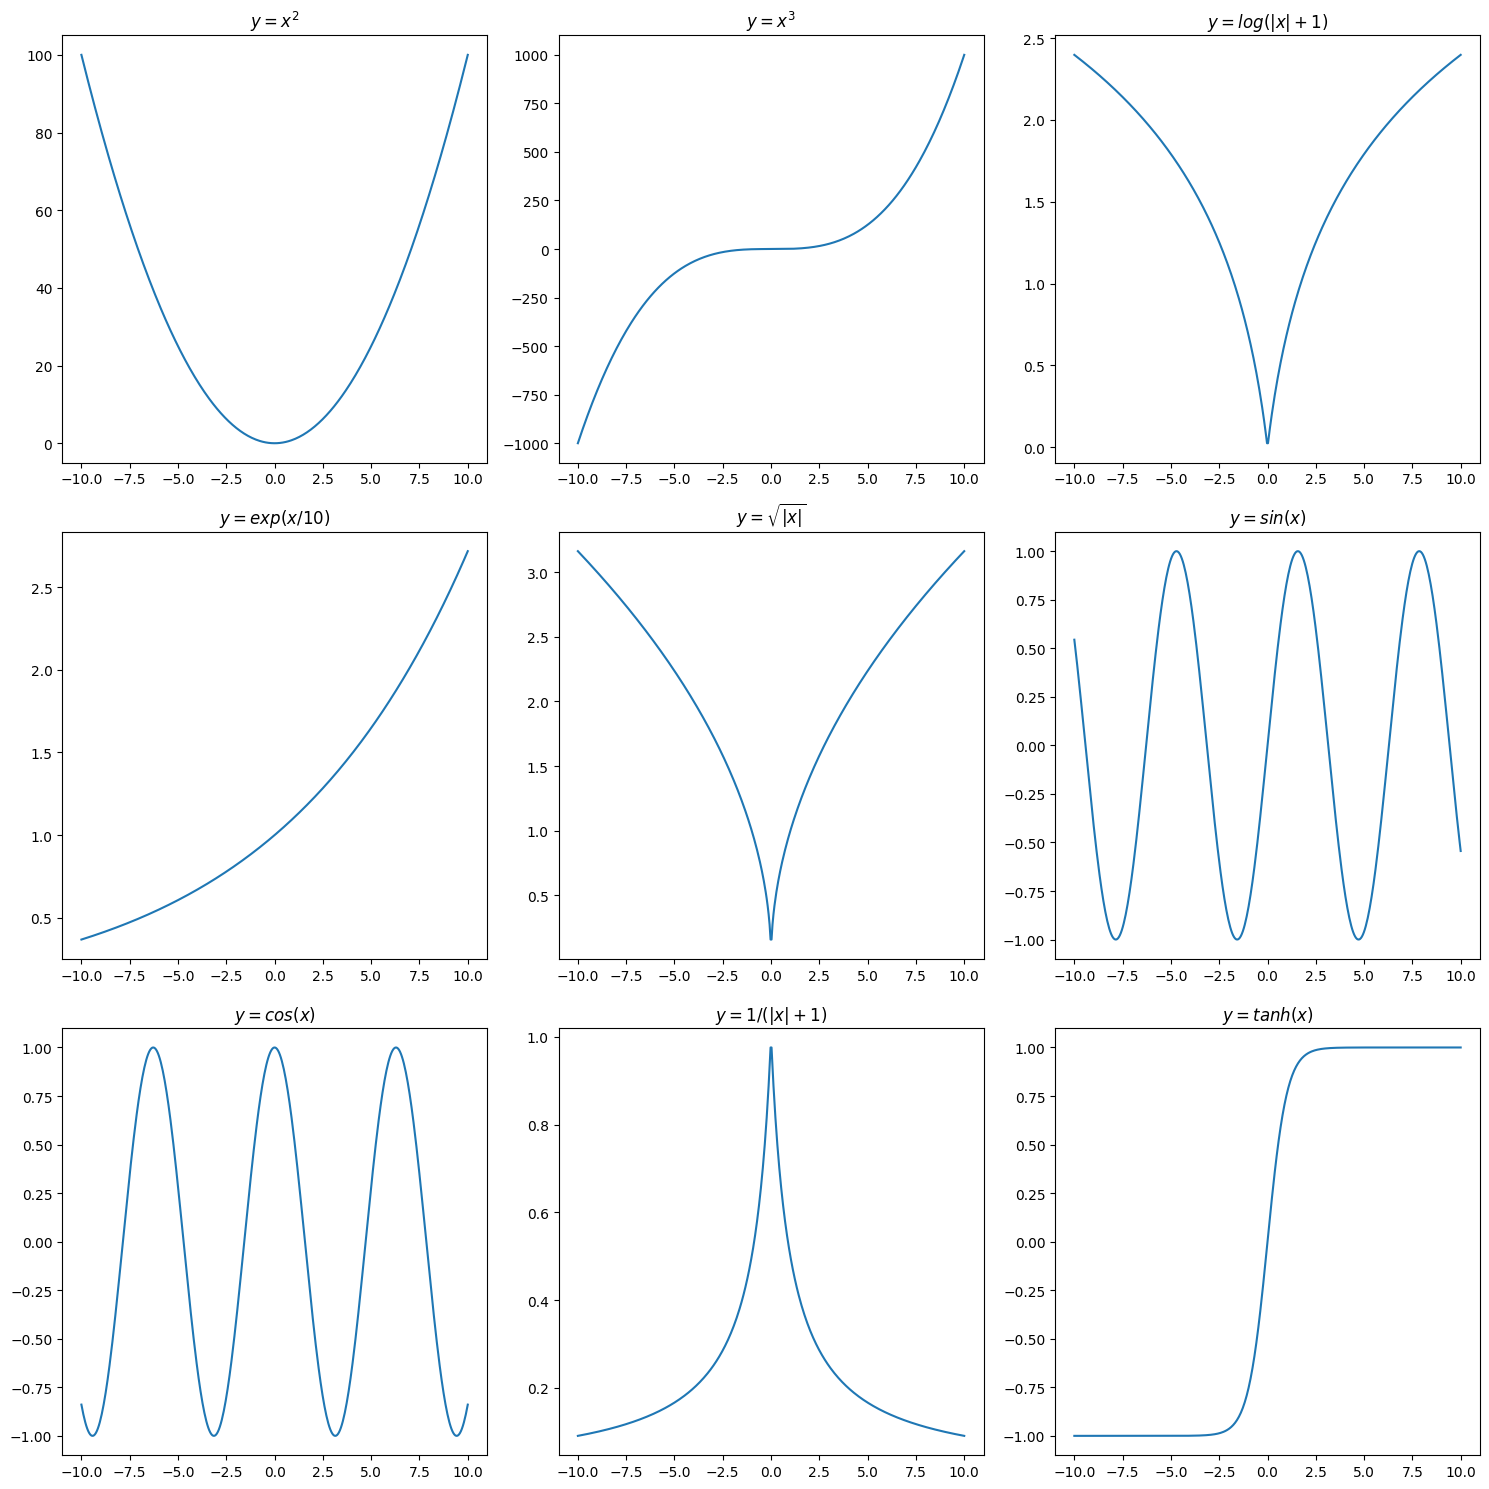

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# generate a range of x values
x = np.linspace(-10, 10, 400)

# define the functions
y_quadratic = x**2
y_cubic = x**3
y_log = np.log(np.abs(x) + 1)  # to handle negative values and avoid log(0)
y_exp = np.exp(x / 10)  # scale to make the exponential growth more visible
y_sqrt = np.sqrt(np.abs(x))
y_sin = np.sin(x)
y_cos = np.cos(x)
y_inverse = 1 / (np.abs(x) + 1)  # to handle x=0
y_tanh = np.tanh(x)

# creating plots for each transformation
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

axs[0, 0].plot(x, y_quadratic)
axs[0, 0].set_title('$y = x^2$')

axs[0, 1].plot(x, y_cubic)
axs[0, 1].set_title('$y = x^3$')

axs[0, 2].plot(x, y_log)
axs[0, 2].set_title('$y = log(|x| + 1)$')

axs[1, 0].plot(x, y_exp)
axs[1, 0].set_title('$y = exp(x / 10)$')

axs[1, 1].plot(x, y_sqrt)
axs[1, 1].set_title('$y = \sqrt{|x|}$')

axs[1, 2].plot(x, y_sin)
axs[1, 2].set_title('$y = sin(x)$')

axs[2, 0].plot(x, y_cos)
axs[2, 0].set_title('$y = cos(x)$')

axs[2, 1].plot(x, y_inverse)
axs[2, 1].set_title('$y = 1/(|x| + 1)$')

axs[2, 2].plot(x, y_tanh)
axs[2, 2].set_title('$y = tanh(x)$')

plt.tight_layout()
plt.show()

**Short Report on Linear Regression:** <br>
Data Loading and Visualization: <br>
I started by loading the training and test datasets, then visualized these datasets to intuitively grasp the relationship between X and Y. <br>
<br>
Linear Regression Implementation: <br>
I defined the loss function to quantitatively assess the model's accuracy by measuring the average squared difference between actual outcomes and predictions made by the model. Gradient descent was implemented as an optimization technique to minimize the loss function. This iterative process adjusted the model's parameters to find the least cost, hence the best fit for the data. The data preparation phase involved augmenting the feature set with an intercept term to accommodate the model's bias term, ensuring a more flexible and accurate model. <br>
<br>
Model Training: Utilizing the training data, I employed gradient descent to iteratively refine our model's parameters, reducing the cost function's value with each iteration until I found the optimal parameters that minimized the loss. <br>
<br>
Visualization and Model Evaluation: <br>
Post-training, I visualized the model's fit by plotting the regression line against the datasets, showcasing the model's ability to capture the linear relationship between X and Y.